<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling10/blob/main/NLTK_WordsAsVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK

**Natural Language Toolkit** (набор инструментов для естественной обработки языка) - *встроенный* пакет библиотек и программ для обработки естественного языка (токенизация, стемминг, лемматизация, POS-тэггинг, графическое представление структуры, ...).

Сейчас мы посмотрим на некоторое из того, что этот набор библиотек умеет.


In [2]:
import nltk
nltk.download('punkt') # для word_tokenize
nltk.download('averaged_perceptron_tagger') # для pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Найдём частотность слов

**Brown University Standard Corpus of Present-Day American English** (Brown Corpus) - корпус текстов на американском английском, первый структурированный корпус текстов разных жанров (1967).

In [3]:
nltk.download('brown') # скачиваем корпус
brown = nltk.corpus.brown
brown.words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [4]:
frequency = nltk.FreqDist(brown.words()) # находим абсолютную частотность слов

In [ ]:
frequency.most_common(30) # выводим самые часто встречающиеся слова

Ну такое. Суть потерялась по дороге. Напишем код, который убирает самые частотные бессмысленные слова (**stopwords / стоп-слова**) и пунктуацию.

[Здесь](https://www.nltk.org/book/ch02.html) можно найти другие прикольные корпуса, которыми можно пользоваться. На некоторые из них мы посмотрим позже.

In [ ]:
nltk.download("stopwords")
stops = list(set(nltk.corpus.stopwords.words("russian")))
stops.sort()
stops

In [12]:
nltk.download("stopwords")
stops = list(set(nltk.corpus.stopwords.words("english")))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stops.sort()
stops

In [ ]:
import string
punct = list(string.punctuation)
punct

In [ ]:
frequency = nltk.FreqDist([w for w in brown.words() if w.lower() not in list(stops) + punct + ['``', "''", '--']])
frequency.most_common(25)

Посмотрим на примере одного текста.

In [20]:
eng_text = 'Cillian Murphy participated in the 2007 Rock the Vote Ireland campaign, targeting young voters for the general election, and campaigning for the rights of the homeless with the organisation Focus Ireland. In 2011, he became a patron of the UNESCO Child and Family Research Centre at the National University of Ireland Galway. He is closely associated with the work of Professor Pat Dolan Director UCFRC and UNESCO Chair in Children, Youth and Civic Engagement. In February 2012, he wrote a message of support to the former Vita Cortex workers involved in a sit-in at their plant, congratulating them for "highlighting [what] is hugely important to us all as a nation". Murphy was a supporter of the 2018 Irish referendum to repeal the eighth amendment of the constitution that restricted access to abortions.'
text_wo_punct = eng_text.translate(str.maketrans('', '', string.punctuation)) # заменяет ''(1) на ''(2) и убирает пунктуацию
text_wo_punct

In [ ]:
tokens = nltk.word_tokenize(text_wo_punct)
tokens

Разметим части речи у выделенных нами слов. На этой [картинке](https://github.com/Whereamiactually/lyceumcompling11/blob/main/POS%20tags%20(NLTK).png) дана расшифровка всех условных сокращений с примерами из английского языка.



In [ ]:
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens

Подсчитаем количество слов каждый части речи.

In [24]:
number_pos = {}
for pair in tagged_tokens:
  if pair[1] in number_pos:
    number_pos[pair[1]] += 1
  else:
    number_pos[pair[1]] = 1
number_pos

{'JJ': 6,
 'NNP': 31,
 'VBD': 5,
 'IN': 20,
 'DT': 19,
 'CD': 4,
 'NN': 17,
 'VBG': 3,
 'NNS': 4,
 'CC': 4,
 'PRP': 5,
 'VBZ': 2,
 'RB': 2,
 'VBN': 2,
 'TO': 4,
 'PRP$': 1,
 'WP': 1,
 'VB': 1,
 'WDT': 1}

In [31]:
frequency_cm = nltk.FreqDist([w for w in tokens if w.lower() not in punct + ['``', "''", '--']])
frequency_cm.most_common(25)

[('the', 13),
 ('of', 7),
 ('a', 5),
 ('and', 4),
 ('to', 4),
 ('in', 3),
 ('Ireland', 3),
 ('for', 3),
 ('Murphy', 2),
 ('with', 2),
 ('In', 2),
 ('he', 2),
 ('UNESCO', 2),
 ('at', 2),
 ('is', 2),
 ('Cillian', 1),
 ('participated', 1),
 ('2007', 1),
 ('Rock', 1),
 ('Vote', 1),
 ('campaign', 1),
 ('targeting', 1),
 ('young', 1),
 ('voters', 1),
 ('general', 1)]

Удалим из нашего текста стоп-слова.

In [32]:
frequency_cm = nltk.FreqDist([w for w in tokens if w.lower() not in list(stops) + punct + ['``', "''", '--']])
frequency_cm.most_common(25)

[('Ireland', 3),
 ('Murphy', 2),
 ('UNESCO', 2),
 ('Cillian', 1),
 ('participated', 1),
 ('2007', 1),
 ('Rock', 1),
 ('Vote', 1),
 ('campaign', 1),
 ('targeting', 1),
 ('young', 1),
 ('voters', 1),
 ('general', 1),
 ('election', 1),
 ('campaigning', 1),
 ('rights', 1),
 ('homeless', 1),
 ('organisation', 1),
 ('Focus', 1),
 ('2011', 1),
 ('became', 1),
 ('patron', 1),
 ('Child', 1),
 ('Family', 1),
 ('Research', 1)]

Распознаем именованные сущности.

In [25]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [27]:
pip install svgling # понадобится для NER

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.5 MB/s eta 0:00:00


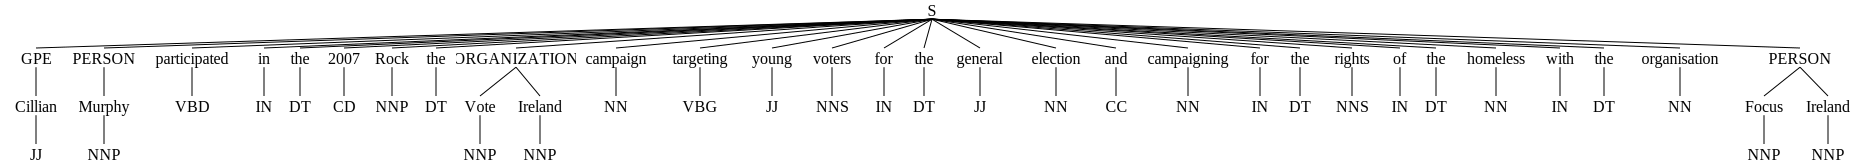

In [29]:
entities = nltk.chunk.ne_chunk(tagged_tokens[:31])
entities

In [50]:
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')
pos_list = set(opinion_lexicon.positive())
neg_list = set(opinion_lexicon.negative())
print(pos_list)
print(neg_list)

{'rejuvenating', 'well-positioned', 'purposeful', 'trumpet', 'geeky', 'enchanted', 'applaud', 'beckoned', 'outdo', 'work', 'heartening', 'stunning', 'qualified', 'achievible', 'refresh', 'adventuresome', 'tempt', 'conciliate', 'invaluable', 'handier', 'selective', 'unbound', 'steadfastly', 'illuminati', 'alluringly', 'jaw-droping', 'upgradeable', 'cheery', 'pre-eminent', 'gratified', 'impressive', 'benefactor', 'simplifying', 'whoa', 'conciliatory', 'adorer', 'cornerstone', 'consistent', 'congratulation', 'overtook', 'renaissance', 'rockstar', 'reverent', 'cozy', 'heartwarming', 'miraculously', 'masterful', 'trump', 'shimmeringly', 'improves', 'memorable', 'unfazed', 'afordable', 'lead', 'magnificent', 'outperforms', 'gentlest', 'acclamation', 'promptly', 'pleases', 'gaiety', 'reforming', 'neatly', 'blessing', 'inspire', 'worth', 'rewarding', 'exquisite', 'admirable', 'cure', 'saintly', 'daringly', 'immaculate', 'prospros', 'awesome', 'satisfying', 'exhilarate', 'prestige', 'courageous

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


# Векторное представление слов

**Людвиг Витгенштейн**: "Значение слова определяется тем, как его используют".

**Слова-векторы** (word vectors) — это численные представления слов, сохраняющие семантическую связь между ними.

Какое слово из [**собака**, **кошка**, **машина**] не подходит в этом предложении? "Моя ___ любит много есть и спать".

Для вектора ***кошка*** одним из наиболее близких будет слово ***собака***. Векторное представление слова ***машина*** достаточно сильно отличается от вектора ***кошка***. Эта схожесть обусловлена частотой встречаемости двух слов (т.е. [**кошка**, **собака**] или [**кошка**, **машина**]) в одном контексте.

Векторные представления слов используются во многих областях:
* Моделирование языков,
* Чат-боты,
* Машинный перевод,
* Вопросно-ответные системы,
* И многое другое...

Векторы слов лежат в основе многих систем обработки естественного языка (NLP), захлестнувших современный мир (Amazon Alexa, Google translate, Siri и т.д.).




### Word2Vec

**Word2Vec** — одна из самых известных дистрибутивных моделей, использующая нейросеть. Алгоритмы **Word2Vec** используют контекст, чтобы сформировать численные представления слов, поэтому слова, используемые в одном и том же контексте, имеют похожие векторы.

**Word2Vec** состоит из двух двух алгоритмов: **Skip-Gram** и **Continuous Bag-of-Words** (CBOW). **Skip-Gram** предсказывает близлежащие слова на основании одного слова. **CBOW** (или мешок слов) предсказывает слово на основании контекста.

**Как нам создать числовой вектор для каждого слова?**

Как всегда, чтобы обучить модель обрабатывать естественный язык, нужно дать ей большой корпус данных.

Она создаст вектор для каждого слова, основываясь на его дистрибуции.

В грубом приближении, между словами могут быть два отношения.

1. **Синтагматическое отношение** — в этом отношении состоят слова, которые встречаются вместе в одном предложении, абзаце или тексте. Так работают **коллокации** — словосочетание, имеющее признаки синтаксически и семантически целостной единицы. Например, ***молоть чушь***, ***нести бред***, ***выносить приговор***, ***герметически закрыто*** и т.д.
2. **Парадигматическое отношение** - в этом отношении находятся слова, которые не встречаются вместе в одном контексте, но при этом контексты их употребления схожи. Например, [***плохая*** | ***хорошая идея***], [***я люблю*** | ***ненавижу кабачки***] и т.д.

[Здесь](https://github.com/Whereamiactually/lyceumcompling10/tree/main/Word2Vec) есть картинки, которые наглядно показывают, как могут соотноситься два слова.



### Этапы создания модели векторного представления слов

1. Читается корпус, и рассчитывается встречаемость каждого слова в корпусе.
2. Массив слов сортируется по частоте и удаляются редкие слова.
3. Строится [дерево Хаффмана](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B4_%D0%A5%D0%B0%D1%84%D1%84%D0%BC%D0%B0%D0%BD%D0%B0) (для кодирования словаря — это значительно снижает вычислительную и временную сложность алгоритма).
4. Из корпуса читается т.н. субпредложение (базовый элемент корпуса — предложение, абзац, статья) и проводится субсэмплирование (процесс изъятия наиболее частотных слов) из анализа.
5. По субпредложению проходим окном (максимальная дистанция между текущим и предсказываемым словом в предложении).
6. Применяется нейросеть прямого распространения с функцией активации иерархический софтмакс и/или негативное сэмплирование.

[Здесь](https://habr.com/ru/articles/446530/) есть очень крутой гайд по векторному представлению слов с картинками.



